In [31]:
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df[train_df["keyword"] == "ablaze"][:10]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0


### Text pre-processing

In [25]:
def clean_text(text, keep_num=False):
    clean_corp = []
    if keep_num:
        for corpus in text:
            corpus = corpus.lower() # lowercasing
            corpus = re.sub(r"[^a-zA-Z0-9 ]", '', corpus) # remove punctuation marks and special characters
            corpus = corpus.strip() # remove white spaces
            clean_corp.append(corpus)
        return clean_corp
    else:
        for corpus in text:
            corpus = corpus.lower() # lowercasing
            corpus = re.sub(r'\d+', '', corpus) # remove digits
            corpus = re.sub(r"[^a-zA-Z0-9 ]", '', corpus) # remove punctuation marks and special characters
            corpus = corpus.strip() # remove white spaces
            clean_corp.append(corpus)
        return clean_corp
        

def lematize(token_col):
    lema_token_col = []
    lemmatizer = WordNetLemmatizer()
    for tokens in token_col:
        lema_token = []
        for token in tokens:
            lema_token.append(lemmatizer.lemmatize(token))
        lema_token_col.append(lema_token)
    return lema_token_col
            
def tokenize(text):
    return [corpus.split() for corpus in text]

In [66]:
clean_trn_df = train_df
clean_trn_df["clean_text"] = clean_text(clean_trn_df["text"])
clean_trn_df["tokens"] = tokenize(clean_trn_df["clean_text"])
clean_trn_df["lema_token"] = lematize(clean_trn_df["tokens"])

In [67]:
clean_trn_df.head()

,id,keyword,location,text,target,clean_text,tokens,lema_token,no_stpwrd_token2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[our, deed, are, the, reason, of, this, earthq...","[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[all, resident, asked, to, shelter, in, place,...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfire, evacuation, order,...","[receive, wildfires, evacuation, orders, calif..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[just, got, sent, this, photo, from, ruby, ala...","[photo, ruby, alaska, smoke, wildfires, pours,..."


In [68]:
def word_frequency_plot(tokens):
    #counts the words, pairs and trigrams
    counted = Counter(tokens)
    counted_2= Counter(ngrams(tokens,2))
    counted_3= Counter(ngrams(tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    # create subplot of the different data frames
    fig, axes = plt.subplots(3,1,figsize=(8,20))
    sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
    sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))
    sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30))

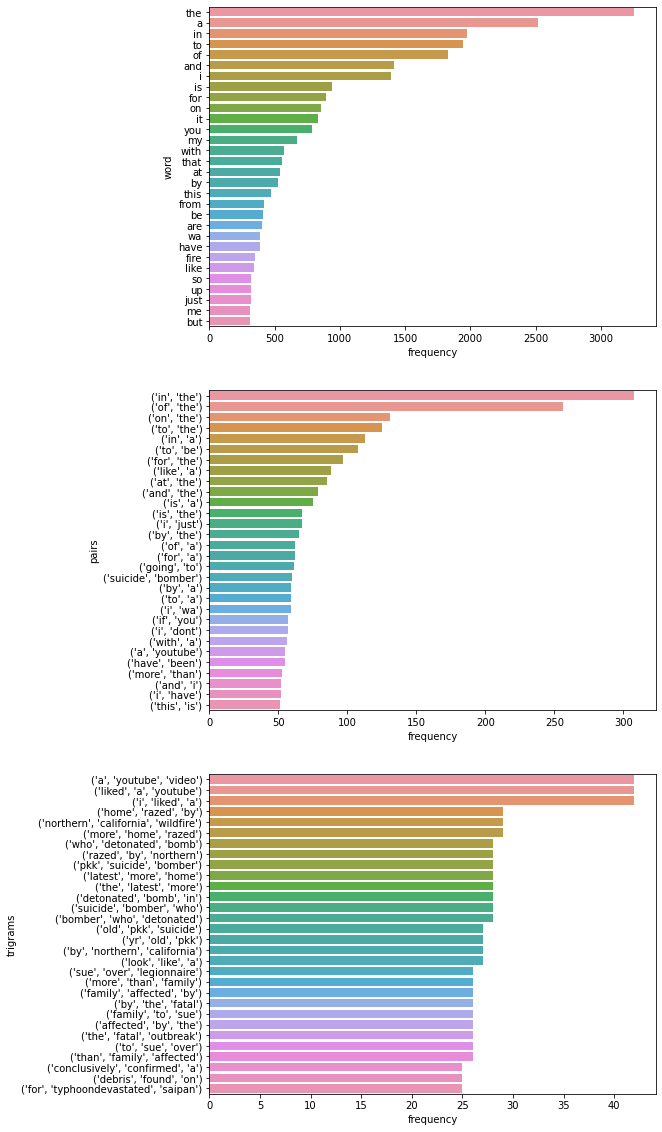

In [69]:
# most frequently occurring words
all_tokens = [token for token_set in clean_trn_df["lema_token"] for token in token_set]
word_frequency_plot(all_tokens)

#### Findings: Most frequently occurring words are stop words

### Removal of stop words

In [70]:
def remove_stopword(token_col):
    wo_stopword_df = []
    for tokens in token_col:
        wo_stopword = []
        for token in tokens:
            if not token in stopwords.words():
                wo_stopword.append(token)
        wo_stopword_df.append(wo_stopword)
    return wo_stopword_df

In [72]:
# clean_trn_df["no_stpwrd_token"] = remove_stopword(clean_trn_df["lema_token"])
import time
start_time = time.time()
clean_trn_df["no_stpwrd_token2"] = remove_stopword(clean_trn_df["tokens"])
print("--- %s seconds ---" % (time.time() - start_time))

--- 229.32093620300293 seconds ---


In [73]:
clean_trn_df.head()

,id,keyword,location,text,target,clean_text,tokens,lema_token,no_stpwrd_token2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[our, deed, are, the, reason, of, this, earthq...","[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[all, resident, asked, to, shelter, in, place,...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfire, evacuation, order,...","[receive, wildfires, evacuation, orders, calif..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[just, got, sent, this, photo, from, ruby, ala...","[photo, ruby, alaska, smoke, wildfires, pours,..."


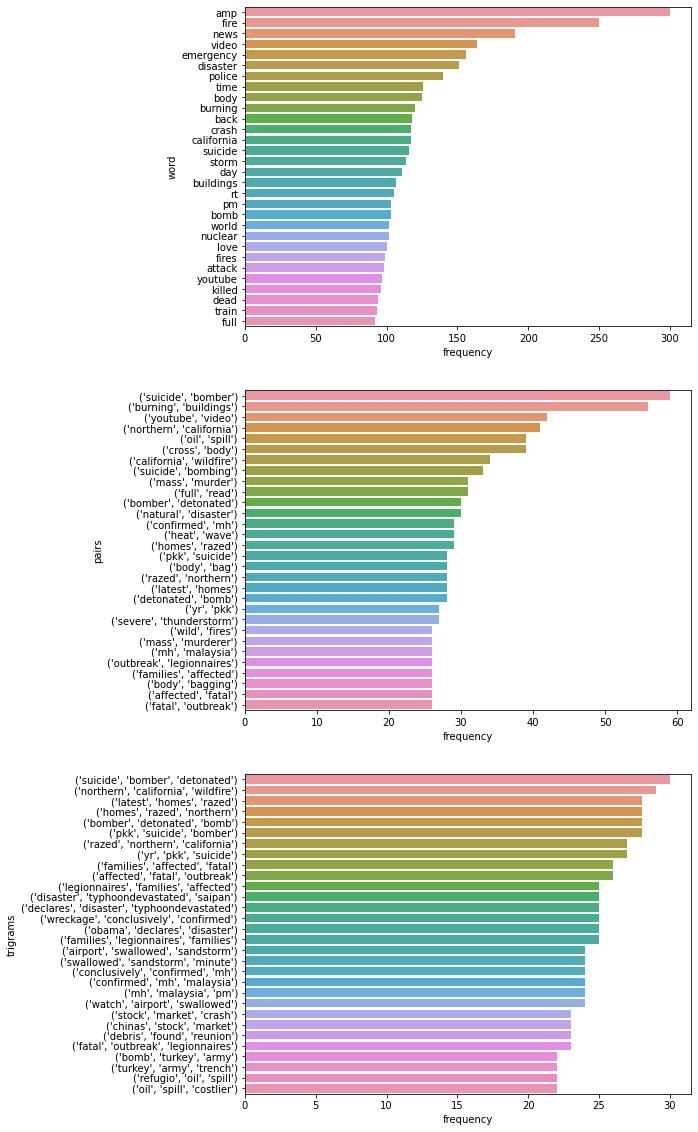

In [74]:
# most frequently occurring words in non-lematized text
all_tokens = [token for token_set in clean_trn_df["no_stpwrd_token2"] for token in token_set]
word_frequency_plot(all_tokens)

In [77]:
clean_trn_df.to_csv("Data/clean_train_data.csv", index=False)

## TF-IDF

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
clean_df = pd.read_csv("Data/clean_train_data.csv")

In [80]:
clean_df

,id,keyword,location,text,target,clean_text,tokens,lema_token,no_stpwrd_token2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"['our', 'deeds', 'are', 'the', 'reason', 'of',...","['our', 'deed', 'are', 'the', 'reason', 'of', ...","['deeds', 'reason', 'earthquake', 'allah', 'fo..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'ronge', 'sask', 'canada']"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"['all', 'residents', 'asked', 'to', 'shelter',...","['all', 'resident', 'asked', 'to', 'shelter', ...","['residents', 'asked', 'shelter', 'place', 'no..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"['people', 'receive', 'wildfires', 'evacuation...","['people', 'receive', 'wildfire', 'evacuation'...","['receive', 'wildfires', 'evacuation', 'orders..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"['just', 'got', 'sent', 'this', 'photo', 'from...","['just', 'got', 'sent', 'this', 'photo', 'from...","['photo', 'ruby', 'alaska', 'smoke', 'wildfire..."
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"['two', 'giant', 'cranes', 'holding', 'a', 'br...","['two', 'giant', 'crane', 'holding', 'a', 'bri...","['giant', 'cranes', 'holding', 'bridge', 'coll..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest the out of control wild...,"['ariaahrary', 'thetawniest', 'the', 'out', 'o...","['ariaahrary', 'thetawniest', 'the', 'out', 'o...","['ariaahrary', 'thetawniest', 'control', 'wild..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m utckm s of volcano hawaii httptcozdtoydebj,"['m', 'utckm', 's', 'of', 'volcano', 'hawaii',...","['m', 'utckm', 's', 'of', 'volcano', 'hawaii',...","['utckm', 'volcano', 'hawaii', 'httptcozdtoyde..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating after an ebike collided w...,"['police', 'investigating', 'after', 'an', 'eb...","['police', 'investigating', 'after', 'an', 'eb...","['police', 'investigating', 'ebike', 'collided..."


In [54]:
vectorizer = TfidfVectorizer()
vec = vectorizer.fit_transform(clean_trn_df["clean_text"][:10])

In [55]:
vectorizer.get_feature_names()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['across',
 'afraid',
 'alaska',
 'all',
 'allah',
 'an',
 'and',
 'are',
 'area',
 'areas',
 'as',
 'asked',
 'being',
 'both',
 'building',
 'by',
 'cafire',
 'california',
 'can',
 'canada',
 'causes',
 'closed',
 'colorado',
 'coming',
 'county',
 'deeds',
 'directions',
 'disaster',
 'due',
 'earthquake',
 'emergency',
 'evacuation',
 'expected',
 'fire',
 'flash',
 'flood',
 'flooding',
 'forest',
 'forgive',
 'from',
 'got',
 'happening',
 'heavy',
 'hill',
 'hwy',
 'im',
 'in',
 'into',
 'is',
 'just',
 'la',
 'lake',
 'manitou',
 'may',
 'near',
 'no',
 'notified',
 'now',
 'of',
 'officers',
 'on',
 'or',
 'orders',
 'other',
 'our',
 'people',
 'photo',
 'place',
 'pours',
 'rain',
 'reason',
 'receive',
 'residents',
 'rockyfire',
 'ronge',
 'ruby',
 'sask',
 'school',
 'see',
 'sent',
 'shelter',
 'smoke',
 'springs',
 'street',
 'streets',
 'that',
 'the',
 'theres',
 'this',
 'to',
 'top',
 'tornado',
 'update',
 'us',
 'wildfires',
 'woods']

In [57]:
tfidf_df = pd.DataFrame(vec.toarray(), index=list(clean_trn_df["id"])[:10], columns=vectorizer.get_feature_names())

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
tfidf_df[tfidf_df>0]

,across,afraid,alaska,all,allah,an,and,are,area,areas,...,the,theres,this,to,top,tornado,update,us,wildfires,woods
1,NaN,NaN,NaN,0.257710,0.303156,NaN,NaN,0.257710,NaN,NaN,...,0.200455,NaN,0.257710,NaN,NaN,NaN,NaN,0.303156,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.171413,NaN,NaN,NaN,0.342825,NaN,NaN,...,NaN,NaN,NaN,0.149966,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338067,NaN
7,NaN,NaN,0.247873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.210715,NaN,NaN,NaN,NaN,NaN,0.184350,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.208940,NaN,NaN,0.280936,NaN,0.208940,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.279058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,0.303365,NaN,NaN,NaN,...,0.401187,NaN,NaN,NaN,0.303365,NaN,NaN,NaN,NaN,0.303365
14,0.307289,NaN,NaN,NaN,NaN,0.307289,NaN,NaN,NaN,NaN,...,0.406377,0.307289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,0.344303,NaN,NaN,NaN,NaN,NaN,NaN,0.344303,NaN,...,0.227663,NaN,NaN,0.256068,NaN,0.344303,NaN,NaN,NaN,NaN


In [59]:
tfidf_df

,across,afraid,alaska,all,allah,an,and,are,area,areas,...,the,theres,this,to,top,tornado,update,us,wildfires,woods
1,0.000000,0.000000,0.000000,0.257710,0.303156,0.000000,0.000000,0.257710,0.000000,0.000000,...,0.200455,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.171413,0.000000,0.000000,0.000000,0.342825,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.149966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338067,0.000000
7,0.000000,0.000000,0.247873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.210715,0.000000,0.000000,0.000000,0.000000,0.000000,0.184350,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.208940,0.000000,0.000000,0.280936,0.000000,0.208940,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.279058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303365,0.000000,0.000000,0.000000,...,0.401187,0.000000,0.000000,0.000000,0.303365,0.000000,0.000000,0.000000,0.000000,0.303365
14,0.307289,0.000000,0.000000,0.000000,0.000000,0.307289,0.000000,0.000000,0.000000,0.000000,...,0.406377,0.307289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,0.000000,0.344303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344303,0.000000,...,0.227663,0.000000,0.000000,0.256068,0.000000,0.344303,0.000000,0.000000,0.000000,0.000000
